In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
from scipy.stats import norm, gamma, invgamma, mode
from scipy.optimize import minimize

In [2]:
n_points = 20
sample = norm(0, 1).rvs(n_points)
beta = 0.5 * np.sum(sample**2)
post = invgamma(a = n_points/2, scale = beta)

In [3]:
intervals = np.array([[post.ppf(start), post.ppf(start + .9)] for start in np.linspace(0, .1, 100)])

In [4]:
idx = np.argmin(np.diff(intervals, axis=1))

In [5]:
intervals[idx]

array([0.55424481, 1.66926602])

In [6]:
post.ppf(.05), post.ppf(1-.05)

(0.6406904707595341, 1.8546414894392376)

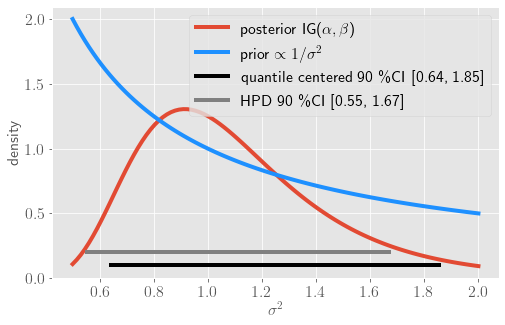

In [9]:
plt.figure(figsize=(8, 5))
x = np.linspace(.5, 2, 100)
plt.plot(x, post.pdf(x), label=r'posterior IG($\alpha, \beta $)')
plt.plot(x, 1/x, label='prior $\propto 1/\sigma^2$', color='dodgerblue')
plt.plot([post.ppf(.05), post.ppf(1-.05)], [.1, .1], color='black', label=f'quantile centered 90 \%CI [{np.round(post.ppf(.05), 2)}, {np.round(post.ppf(1-.05), 2)}]')
#plt.scatter(post.mean(), .1, color='black', s=100)
plt.plot(intervals[idx], [.2, .2], color='gray', label=f'HPD 90 \%CI [{np.round(intervals[idx][0], 2)}, {np.round(intervals[idx][1], 2)}]')
#plt.scatter(minimize(lambda x: -post.pdf(x),5).x, .2, color='gray', s=100)
plt.xlabel('$\sigma^2$')
plt.ylabel('density')
plt.legend()
plt.savefig('../figures/poisson.png', dpi=300, bbox_inches='tight')

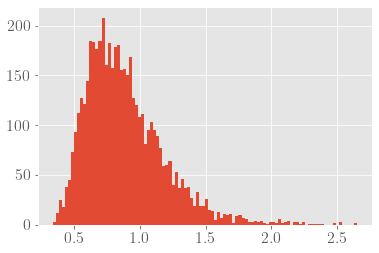

In [131]:
plt.hist(post.rvs(5000), bins=100);

In [132]:
mode(post.rvs(5000))

ModeResult(mode=array([0.31644978]), count=array([1]))